<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Informe-Georef" data-toc-modified-id="Informe-Georef-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Informe Georef</a></span></li><li><span><a href="#Llamadas-a-la-API" data-toc-modified-id="Llamadas-a-la-API-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Llamadas a la API</a></span><ul class="toc-item"><li><span><a href="#Tipos-de-llamadas" data-toc-modified-id="Tipos-de-llamadas-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tipos de llamadas</a></span></li><li><span><a href="#Métodos-utilizados" data-toc-modified-id="Métodos-utilizados-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Métodos utilizados</a></span></li></ul></li><li><span><a href="#Evolución-mensual" data-toc-modified-id="Evolución-mensual-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Evolución mensual</a></span></li><li><span><a href="#¿De-dónde-vienen-las-llamadas?" data-toc-modified-id="¿De-dónde-vienen-las-llamadas?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>¿De dónde vienen las llamadas?</a></span></li><li><span><a href="#¿Desde-qué-entorno-se-realiza-la-llamada?" data-toc-modified-id="¿Desde-qué-entorno-se-realiza-la-llamada?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>¿Desde qué entorno se realiza la llamada?</a></span></li><li><span><a href="#Operaciones" data-toc-modified-id="Operaciones-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Operaciones</a></span><ul class="toc-item"><li><span><a href="#Normalizaciones" data-toc-modified-id="Normalizaciones-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Normalizaciones</a></span></li></ul></li><li><span><a href="#Uso-de-los-parámetros" data-toc-modified-id="Uso-de-los-parámetros-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Uso de los parámetros</a></span><ul class="toc-item"><li><span><a href="#Conjuntos-de-parámetros-más-frecuentes" data-toc-modified-id="Conjuntos-de-parámetros-más-frecuentes-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Conjuntos de parámetros más frecuentes</a></span></li></ul></li><li><span><a href="#Caracterización-de-usuarios" data-toc-modified-id="Caracterización-de-usuarios-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Caracterización de usuarios</a></span><ul class="toc-item"><li><span><a href="#Evolución-de-cantidad-de-usuarios-únicos" data-toc-modified-id="Evolución-de-cantidad-de-usuarios-únicos-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Evolución de cantidad de usuarios únicos</a></span></li></ul></li><li><span><a href="#Evolución-de-la-cantidad-de-usuarios-únicos-por-tipo-de-llamada" data-toc-modified-id="Evolución-de-la-cantidad-de-usuarios-únicos-por-tipo-de-llamada-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Evolución de la cantidad de usuarios únicos por tipo de llamada</a></span></li><li><span><a href="#Palabras-más-buscadas-en-direcciones" data-toc-modified-id="Palabras-más-buscadas-en-direcciones-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Palabras más buscadas en direcciones</a></span></li><li><span><a href="#Anexo" data-toc-modified-id="Anexo-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Anexo</a></span><ul class="toc-item"><li><span><a href="#Uso-de-la-API-por-parte-de-OSDE" data-toc-modified-id="Uso-de-la-API-por-parte-de-OSDE-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Uso de la API por parte de OSDE</a></span></li><li><span><a href="#Uso-de-la-API-por-parte-de-mi.argentina" data-toc-modified-id="Uso-de-la-API-por-parte-de-mi.argentina-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Uso de la API por parte de mi.argentina</a></span></li></ul></li></ul></div>

# Informe Georef 

In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import import_ipynb;
import georef_log_analysis
import georef_analytics_analysis

import urllib.parse as urlparse
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from IPython.core.display import display, HTML

%matplotlib inline
sns.set()
# plt.rcParams['image.cmap'] = 'Accent'
plt.rcParams['image.cmap'] = 'tab20c'


html_tagger = lambda x,y: '<{0}>{1}</{0}>'.format(y,x)

def display_html(content, tag='p'):
    display(HTML( '<{0}>{1}</{0}>'.format(tag,content) ))

importing Jupyter notebook from georef_log_analysis.ipynb
importing Jupyter notebook from georef_analytics_analysis.ipynb


georef_analytics_analysis.ipynb:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  "cell_type": "code",


In [2]:
mssg = 'Reporte creado el día: {}'.format(str(pd.Timestamp.today())) 

display_html(mssg)

In [3]:
analytics_min_date = str(georef_analytics_analysis.df_analytics.date.min())
analytics_max_date = str(georef_analytics_analysis.df_analytics.date.max())

log_min_date = georef_log_analysis.df_log.time_local.min()
log_max_date= georef_log_analysis.df_log.time_local.max()

df_log = georef_log_analysis.df_log
df_analytics = georef_analytics_analysis.df_analytics

In [4]:
mssg = '''Analytics de API Management
    Período comprendido: {} - {}
    Cantidad de registros: {}
Log del servidor
    Período comprendido: {} - {}
    Cantidad de registros: {}'''.format(analytics_min_date[:10], analytics_max_date[:10],
          df_analytics.shape[0],
          log_min_date[:10], log_max_date[:10],
          df_log.shape[0])

salvo = html_tagger('Salvo aclaración, la fuente utilizada es el Analytics de API Management.','p')

html_mssg = []
for text in mssg.split('\n'):
    if text[0] is not ' ':
        html_mssg.append( html_tagger(text,'li ') )
    else:
        html_mssg.append( html_tagger(text,'li style="text-indent: 40px"') )
        
html_mssg = html_tagger('Fuentes de datos:','p') + ''.join(html_mssg) + '\n' + salvo
        
display(HTML(''.join(html_mssg)))


# display(HTML(''.join([ html_tagger(text,'li ') for text in asd.split('\n') if text[0] is not ' '])))
# style="text-indent: 40px"

# display(HTML(html_tagger(asd,'p style="text-indent: 40px"')))




# Llamadas a la API

In [5]:
mssg = 'Cantidad de llamadas a la API: {}.'.format(df_analytics.shape[0])
display_html(mssg)

## Tipos de llamadas

Se distinguen los siguientes tipos de llamadas:
- _Enriquecimiento_: corresponden al endpoint _ubicacion_
- _Normalización de direcciones_: contienen el parámetro _direccion_
- _Normalización de nombres_: contienen el parámetro _nombre_ 
- _Referenciación_: no corresponde a los tipos anteriores


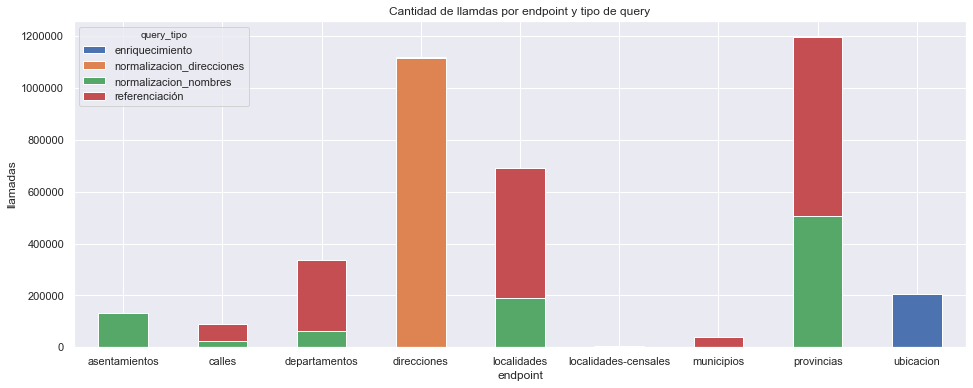

In [6]:
# df_aux = georef_log_analysis.df_hits[['endpoint','query_tipo','hits']].groupby(['endpoint','query_tipo']).sum().reset_index()
df_aux = georef_analytics_analysis.df_hits[['endpoint','query_tipo','hits']].groupby(['endpoint','query_tipo']).sum().reset_index()

pivot_df = df_aux.pivot(index='endpoint', columns='query_tipo', values='hits').fillna(0)
pivot_df.plot.bar(stacked=True, figsize=[16,6]);
plt.xticks(rotation=0)
plt.xlabel('endpoint')
plt.ylabel('llamadas')
plt.title('Cantidad de llamdas por endpoint y tipo de query');
# plt.yscale('log')

## Métodos utilizados

In [7]:
# agregar cantidades totales en el títutlo de las tortas de los métodos

In [8]:
# import base64
# from io import BytesIO

# fig = plt.figure()
# #plot sth

# tmpfile = BytesIO()
# fig.savefig(tmpfile, format='png')
# encoded = base64.b64encode(tmpfile.getvalue())

# html_plot = '<img src=\data:image/png;base64,{}\>'.format(encoded)


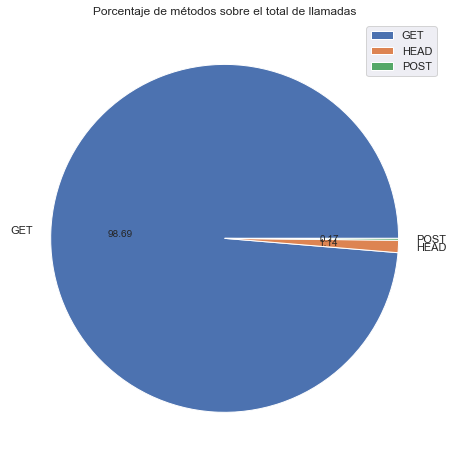

In [9]:
# df_aux = georef_log_analysis.df_hits[['method','hits']].groupby('method').sum()
df_aux = georef_analytics_analysis.df_hits[['request_method','hits']].groupby('request_method').sum()

df_aux.plot.pie(figsize=[8,8], subplots=True, autopct='%.2f');
plt.ylabel('');
plt.title('Porcentaje de métodos sobre el total de llamadas');
# tmpfile = BytesIO()
# plt.savefig(tmpfile, format='png')
# encoded = base64.b64encode(tmpfile.getvalue())

# html_plot = '<img src=\'data:image/png;base64,{}\'>'.format(encoded)
# html_plot = '<img src=\'data:image/png;base64,{}\'>'.format(encoded)
# html = 'data:image/png;base64,{}'.format(encoded)

In [10]:
# df_aux = georef_log_analysis.df_hits[['endpoint','method','hits']].groupby(['endpoint','method']).sum().reset_index()
df_aux = georef_analytics_analysis.df_hits[['endpoint','request_method','hits']].groupby(['endpoint','request_method']).sum().reset_index()

# pivot_df = df_aux.pivot(index='endpoint', columns='method', values='hits').fillna(0)
pivot_df = df_aux.pivot(index='request_method', columns='endpoint', values='hits').fillna(0).loc[['GET','POST'],:]

# pivot_df.plot.bar(stacked=True, figsize=[16,8])
# plt.yscale('log')

# pivot_df = pivot_df.apply(lambda x: x.apply(lambda y: 0 if y < 10 else y))

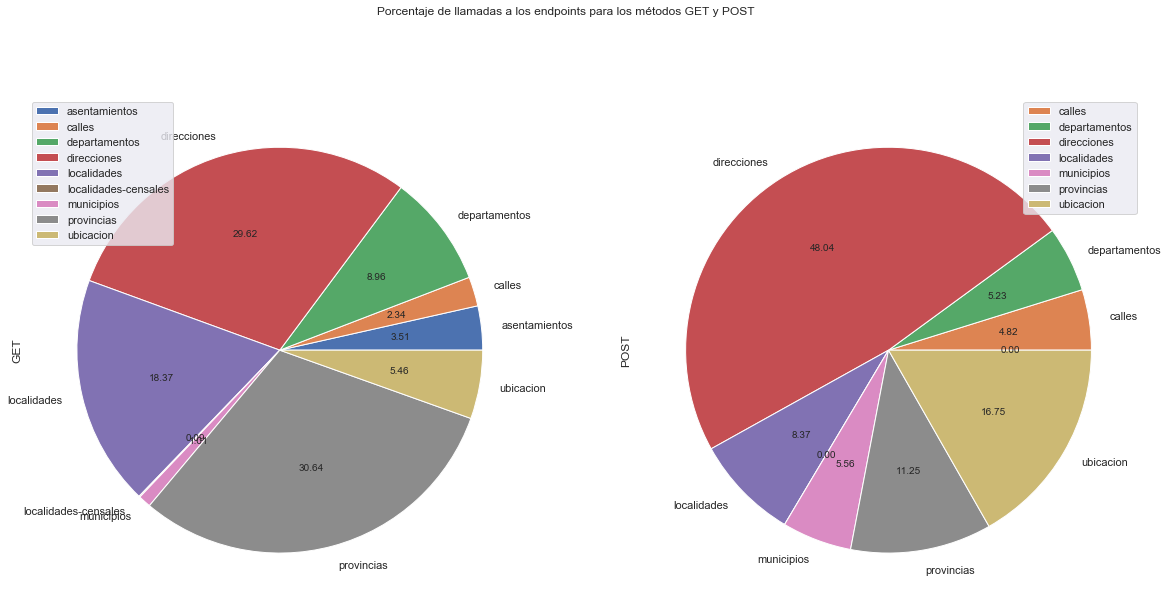

In [11]:
pivot_df.T.plot.pie(subplots=True, figsize=[20,10], autopct='%.2f');
plt.suptitle('Porcentaje de llamadas a los endpoints para los métodos GET y POST');

# Evolución mensual

In [12]:
df_aux = georef_analytics_analysis.df_evolucion_by_tipo.reset_index()

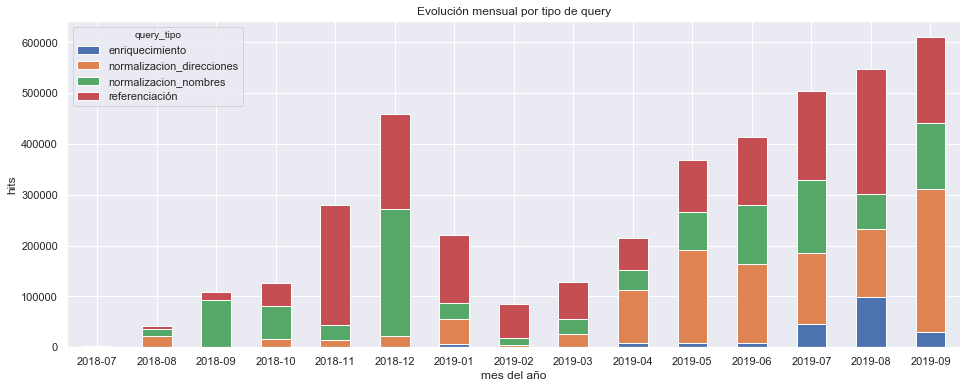

In [13]:
pivot_df = df_aux.pivot(index='date_short', columns='query_tipo', values='id').fillna(0)#.iloc[:-1,:]

pivot_df.plot.bar(stacked=True, figsize=[16,6]);
plt.xticks(rotation=0)
plt.xlabel('mes del año')
plt.ylabel('hits')
plt.title('Evolución mensual por tipo de query');


# ¿De dónde vienen las llamadas?

Fuente: Log del servidor

Se agregan todos los registros que contienen _localhost_, bajo la etiqueta de mismo nombre.

In [14]:
# georef_analytics_analysis.TABLE_COUNTER = 0

In [15]:
df_aux = georef_log_analysis.df_log

# df_aux['netloc'] = df_aux.http_referer.apply(lambda x: x if len(urlparse.urlparse(x).netloc.split('.')) < 2  else urlparse.urlparse(x).netloc.split('.')[1])
df_aux['netloc'] = df_aux.http_referer.apply(lambda x: urlparse.urlparse(x).netloc)

df_netloc = df_aux.netloc.value_counts().to_frame()

df_netloc.loc['localhost','netloc'] = df_netloc[df_netloc.index.str.contains('localhost')].netloc.sum()
df_netloc.drop(index=df_netloc[df_netloc.index.str.contains('localhost:')].index.values, inplace=True)

df_netloc['porcentaje'] = df_netloc.netloc * 100 / df_netloc.netloc.sum()

df_netloc.rename({'':'no-identificado'}, axis=0,inplace=True)

In [16]:
str_df_netloc = georef_analytics_analysis.put_df_on_report(df_netloc.iloc[:10,0:1], 'Principales netlocs')

In [17]:
display(HTML(str_df_netloc))

,netloc
no-identificado,470773
www.osdeneo.com.ar,212250
mi.argentina.gob.ar,72728
tinca-alfredo81.c9users.io,10999
localhost,25500
127.0.0.1:8000,1302
api.relevamientotrans.tk,1036
cultivo.v1,898
datosgobar.github.io,772
3.86.133.221:3001,733


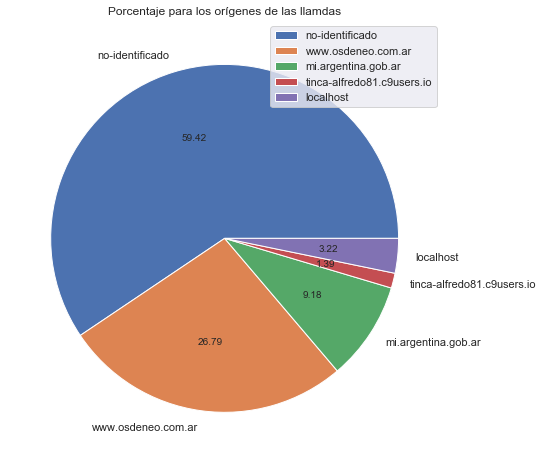

In [18]:
df_netloc[df_netloc.porcentaje > 1].porcentaje.plot(kind='pie', autopct='%.2f', figsize=[8,8], subplots=True, legend=True);
plt.title('Porcentaje para los orígenes de las llamdas')
plt.ylabel('');

# ¿Desde qué entorno se realiza la llamada?

In [19]:
# df_aux = georef_log_analysis.df_log
df_aux = georef_analytics_analysis.df_analytics

df_user_agent = df_aux.user_agent.apply(lambda x: str(x).lower().split('/')[0]).value_counts().to_frame()

main_user_agent = ['mozilla', 'google', 'python', 'curl', 'java', 'excel', 'http']

for ua in main_user_agent:
    contains_ua = df_user_agent.index.str.contains(ua)
    total_ua = df_user_agent.user_agent[contains_ua].sum()

    # drop ua
    df_user_agent.drop(index=df_user_agent[contains_ua].index, inplace=True)

    df_user_agent.loc[ua,'user_agent'] = total_ua
    
df_user_agent.rename({'mozilla':'web-browser'}, axis=0,inplace=True)
df_user_agent.rename({'-':'no-identificado'}, axis=0,inplace=True)

In [20]:
str_df_ua = georef_analytics_analysis.put_df_on_report(df_user_agent.sort_values('user_agent',ascending=False).head(), 'Prinipales user agents')

In [21]:
display(HTML(str_df_ua))

,user_agent
web-browser,"2,332,728"
python,"806,183"
restsharp,"340,792"
jsonlite,"223,733"
curl,"168,833"


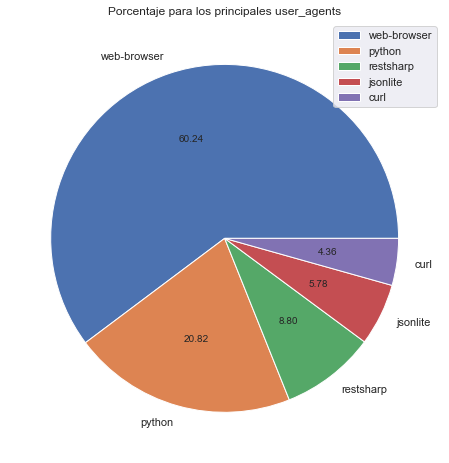

In [22]:
df_user_agent.sort_values('user_agent',ascending=False).head().plot(kind='pie', subplots=True, figsize=[8,8], autopct='%.2f');
plt.title('Porcentaje para los principales user_agents')
plt.ylabel('');

# Operaciones 

## Normalizaciones

Se agregan las normalizaciones de nombres y de direcciones. <br>

In [23]:
# df_aux = georef_log_analysis.df_hits
df_aux = georef_analytics_analysis.df_hits

query_is_norm = df_aux.query_tipo.str.contains('normalizacion')

df_aux = df_aux[query_is_norm][['request_method','endpoint','hits']].groupby(['request_method','endpoint']).sum().reset_index()

percentage_min = 1
norm_total = df_aux.hits.sum()
df_norm_by_method = df_aux.groupby('request_method')['hits'].sum().to_frame().reset_index()

df_norm_by_method

df_norm_by_method.loc[:,'porcentaje'] = df_norm_by_method.iloc[:,1].apply(lambda x: float(x) * 100.00 / float(norm_total))

In [24]:
str_norm = georef_analytics_analysis.put_df_on_report(df_norm_by_method, 'Normalizaciones por método utilizado')

In [25]:
display(HTML(str_norm))

,request_method,hits,porcentaje
0,GET,2032804,99
1,HEAD,11,0


In [26]:
methods = df_norm_by_method[df_norm_by_method.porcentaje > percentage_min].request_method.values
# methods = df_norm_by_method.request_method.values

In [27]:
mssg = 'Total de normalizaciónes: {}'.format(df_norm_by_method.hits.sum())
display_html(mssg)

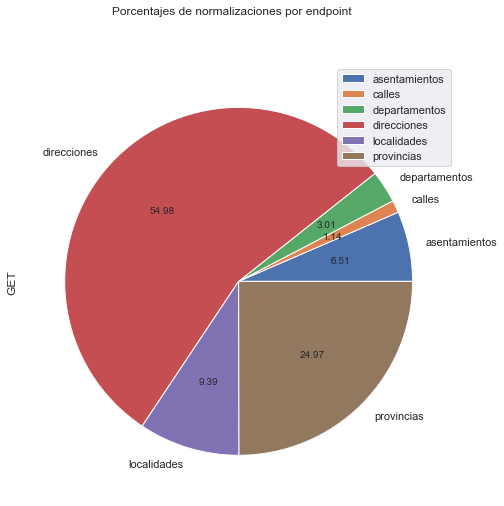

In [28]:
df_pie = df_aux.pivot(index='request_method', columns='endpoint', values='hits').fillna(0).loc[methods,:]

df_pie.T[(df_pie.T.values / df_pie.T.values.sum() * 100) > 1].plot.pie(subplots=True, figsize=[8*len(methods),8], legend=True, autopct='%.2f');
# plt.legend(loc='lower left');

# plt.ylabel('')
plt.suptitle('Porcentajes de normalizaciones por endpoint');

# pivot_df = df_aux.pivot(index='endpoint', columns='query_tipo', values='hits').fillna(0)

# Uso de los parámetros

In [29]:
# df_aux = df_log
df_aux = df_analytics

In [30]:
df_aux['qs_params'] = df_aux.querystring.str.lower().apply(lambda x: list(urlparse.parse_qs(str(x)).keys()))

In [31]:
df_aux['qs_params_str'] = df_aux.querystring.str.lower().apply(lambda x: ' '.join(list(urlparse.parse_qs(str(x)).keys())))

In [32]:
# georef_analytics_analysis.TABLE_COUNTER = 0

In [33]:
title_df = 'Cantidad consultas para cada cantidad de parametros en querystring'
df_params_by_qs = df_aux['qs_params'].apply(len).value_counts().to_frame().rename({'qs_params':'consultas'},axis=1)

str_params_by_qs = georef_analytics_analysis.put_df_on_report(df_params_by_qs, title_df)

In [34]:
display(HTML(str_params_by_qs))

,consultas
2,1625315
1,1302161
3,484108
4,243666
6,218560
0,187753
5,52111


In [35]:
dict_params = {}
for params in df_aux.qs_params.values:
    if params is []:
        continue 
    for param in params:
        count =  dict_params.get(param,0)
        if count is 0:
            dict_params[param] = 1
        else:
            dict_params[param] = count+1

df_param_count = pd.DataFrame(dict_params.values(), index=dict_params.keys())


In [36]:
str_param_count = georef_analytics_analysis.put_df_on_report(df_param_count.sort_values(0, ascending=False), 'Conteo de parámetros')

In [37]:
display(HTML(str_param_count))

,0
max,1530284
provincia,1474830
direccion,1153327
nombre,1097654
departamento,937051
orden,493819
campos,436688
localidad,394143
id,325659
lat,206935


In [38]:
params = df_param_count.sort_values(0, ascending=False).index.values

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

text_values = df_aux.iloc[:,25].apply(lambda x: ' '.join(x).lower()).values

# keys = [' '.join(list(c)) for c in combinations]
keys = params

# vectorizer = CountVectorizer(vocabulary = keys, ngram_range=(1, max_combinations))
vectorizer = CountVectorizer(vocabulary = keys, ngram_range=(1, 1))

data = vectorizer.fit_transform(text_values).astype(np.int16)

In [40]:
vec_k = vectorizer.get_feature_names()

df_cv =pd.SparseDataFrame(data, columns=vec_k).to_dense()

/Users/abenassi/anaconda/envs/analytics/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  This is separate from the ipykernel package so we can avoid doing imports until
/Users/abenassi/anaconda/envs/analytics/lib/python3.7/site-packages/pandas/core/sparse/frame.py:269: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  if column not in sdict
/Users/abenassi/anaconda/envs/analytics/lib/python3.7/site-packages/pandas/core/frame.py:3456: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series

In [41]:
# 15 minutos!

df_cv['counter_vector'] = list(data.toarray())
df_cv['counter_vector_str'] = df_cv['counter_vector'].apply(lambda x: ' '.join(pd.Series(vec_k)[x.astype(bool)].values))
df_cv = df_cv.fillna(0)

In [42]:
frecs = df_cv.to_dense()[['id','counter_vector_str']].groupby('counter_vector_str').count().sort_values(by='id',ascending=False)

/Users/abenassi/anaconda/envs/analytics/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame/Series.to_dense is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


## Conjuntos de parámetros más frecuentes 

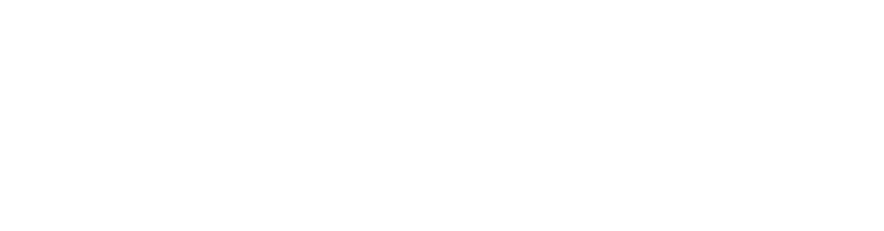

In [43]:
dict_frecs = frecs.to_dict()['id']

wordcloud = WordCloud(width=2400, height=600, background_color="white").generate_from_frequencies(dict_frecs)
# plt.figure(figsize=[8,2])
# plt.figure(figsize=[12,3])
plt.figure(figsize=[16,4])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Caracterización de usuarios

## Evolución de cantidad de usuarios únicos

In [44]:
# df_usrs = df_log[['date_short','remote_addr']].groupby('date_short').count() #.plot.bar(figsqize=[16,6]);
df_usrs = df_analytics[['date_short','ip_address']].groupby('date_short').count() #.plot.bar(figsqize=[16,6]);
# df_usrs['unique_remote_addr'] = 

# df_u_usrs = df_log[['date_short','remote_addr']].drop_duplicates().groupby('date_short').count().rename({'remote_addr':'unique_remote_addr'},axis=1)
df_u_usrs = df_analytics[['date_short','ip_address']].drop_duplicates().groupby('date_short').count().rename({'ip_address':'unique_ip_address'},axis=1)

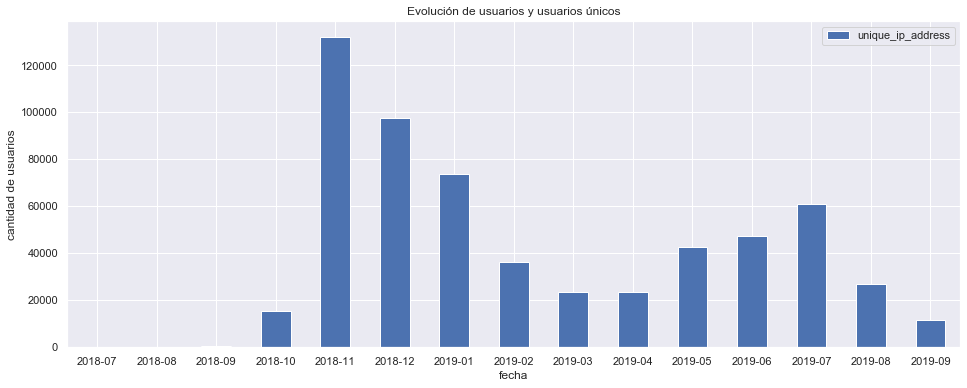

In [45]:
# df_usrs.merge(df_u_usrs, left_index=True, right_index=True).plot.bar(figsize=[16,6])
df_u_usrs.plot.bar(figsize=[16,6])
plt.xticks(rotation=0)
plt.title('Evolución de usuarios y usuarios únicos')
plt.xlabel('fecha')
plt.ylabel('cantidad de usuarios');
# plt.yscale('log')

# Evolución de la cantidad de usuarios únicos por tipo de llamada

Se toma la cantidad de llamadas para cada tipo, y sobre esos registros se analizan los usuarios únicos. Por ende si un usuario realiza distintos tipos de llamadas para un mismo período, se contabiliza por tipo de llamada. 

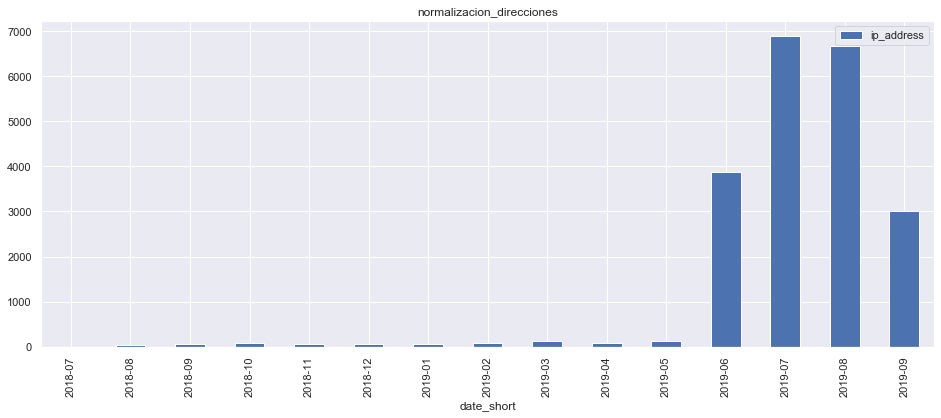

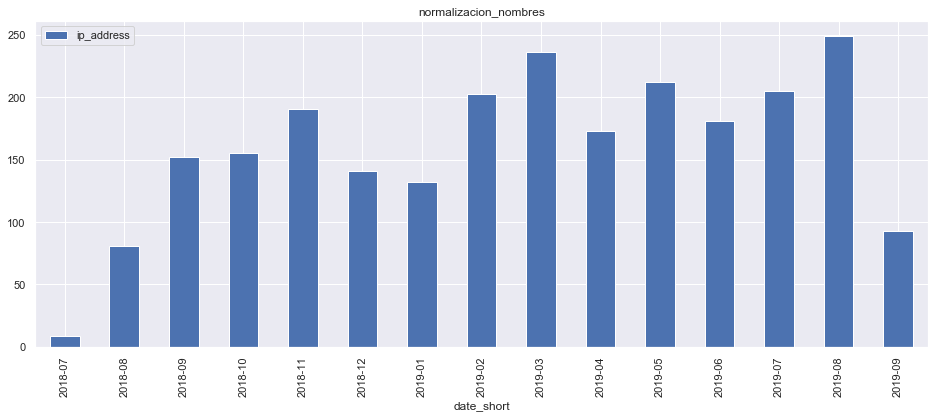

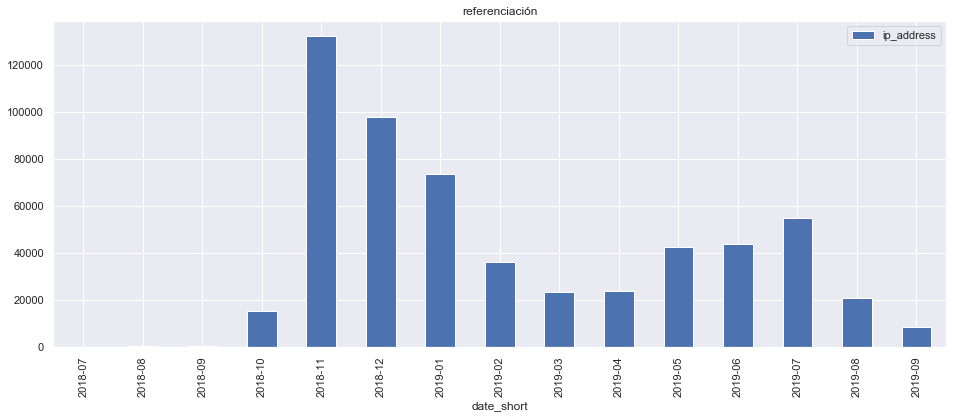

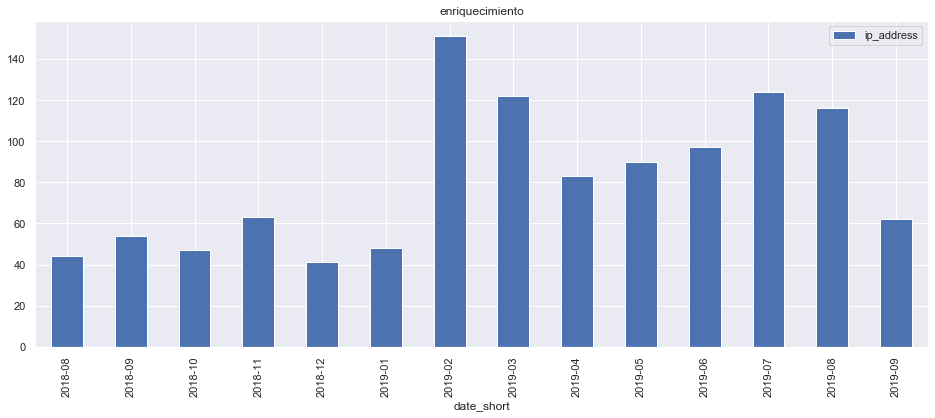

In [46]:
df_aux = georef_analytics_analysis.df_ips_by_tipo.reset_index()

query_tipo = df_aux.query_tipo.unique()
nrows = query_tipo.shape[0]

# fig, ax = plt.subplots(nrows=query_tipo.shape[0], ncols=1, sharex=False)
# fig = plt.figure(figsize=[16,6*4])

for i, qt in enumerate(query_tipo, start=1):
    filtro_qt = df_aux.query_tipo == qt
#     ax_i = ax.subplot(nrows, 1, i)
#     df_aux[filtro_qt].plot.bar(x='date_short', ax=ax_i)
    df_aux[filtro_qt].plot.bar(x='date_short', figsize=[16,6])
    plt.title(qt)
    
    plt.show()

Usar segmentación símil Series de Tiempo

variable: cantidad de llamadas por alguna unidad de tiempo (semana/mes)
clases: usuario, superusuario
(mostrar para clase: cantidad y evolución de llamas por tipo y por endpoint





# Palabras más buscadas en direcciones

In [47]:
# df_aux = df_log
df_aux = df_analytics
qs_direcciones = df_aux.query_tipo.str.contains('normalizacion_direcciones')

df_aux = df_aux[qs_direcciones]
df_aux['qs_params'] = df_aux.querystring.str.lower().apply(lambda x: ''.join(urlparse.parse_qs(str(x)).get('direccion')))

text = ' '.join(df_aux.qs_params.values)

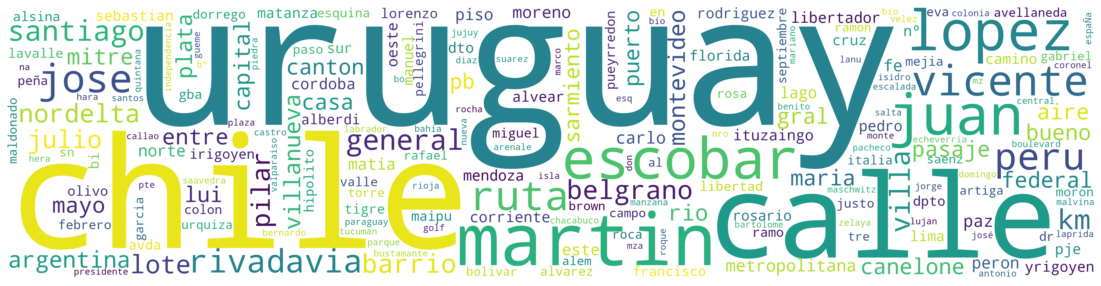

In [48]:
# wordcloud = WordCloud(background_color="white", collocations=False).generate(text)
stop_words = ['de', 'del','la','lo','el','las','los','san','santa','santo','av','avenida']
wordcloud = WordCloud(width=4000, height=1000, stopwords=stop_words, background_color="white", collocations=False).generate(text)

# plt.figure(figsize=[10,6])
plt.figure(figsize=[20,5])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Anexo 

## Uso de la API por parte de OSDE

Fuente: Log del servidor

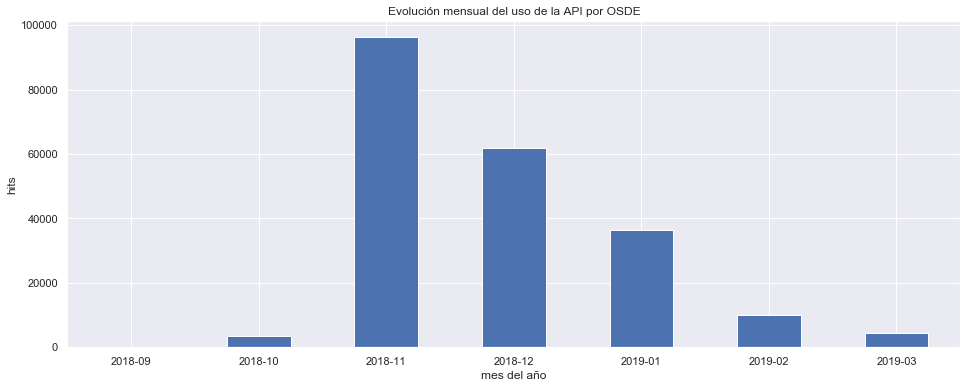

In [49]:
# actividad de OSDE (http_referrer) para anexo
georef_log_analysis.df_osde_by_month.plot(kind='bar', figsize=[16,6], legend=[]);

plt.xticks(rotation=0)
plt.xlabel('mes del año')
plt.ylabel('hits')
plt.title('Evolución mensual del uso de la API por OSDE');

## Uso de la API por parte de mi.argentina 

In [50]:
# Agregar gráficos de cantidad y evolución para el http_referer más usado 

In [51]:
df_aux = georef_log_analysis.df_log

# df_aux['netloc'] = df_aux.http_referer.apply(lambda x: x if len(urlparse.urlparse(x).netloc.split('.')) < 2  else urlparse.urlparse(x).netloc.split('.')[1])
df_aux['netloc'] = df_aux.http_referer.apply(lambda x: urlparse.urlparse(x).netloc)
df_aux['path'] = df_aux.http_referer.apply(lambda x: urlparse.urlparse(x).path)

In [52]:
df_netloc = df_aux.netloc.value_counts().to_frame()

filtro_netloc_arg = df_netloc.index.str.contains('argentina')

str_mi_arg = str_param_count = georef_analytics_analysis.put_df_on_report(df_netloc[filtro_netloc_arg], 'Cantidad de consultas para dominios mi.argentina')

In [53]:
display(HTML(str_mi_arg))

,netloc
mi.argentina.gob.ar,72728
qa-mi.argentina.gob.ar,264
staging-mi.argentina.gob.ar,8
poncheado.argentina.gob.ar,6


In [54]:
filtro_arg = df_aux.netloc.str.contains('argentina')

df_mi_arg_count = df_aux[filtro_arg].groupby(['netloc','path','http_referer'])['-'].count().to_frame()
#                [filtro_arg].path.value_counts().to_frame()

str_mi_arg_details = str_param_count = georef_analytics_analysis.put_df_on_report(df_mi_arg_count, 'Detalle de consultas de dominios mi.argentina')

In [55]:
display(HTML(str_mi_arg_details))